<a href="https://colab.research.google.com/github/Praneethreddy914/garbage-classification-/blob/main/garbage_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install kagglehub
!pip install kagglehub --quiet

# Step 2: Authenticate using your Kaggle API key
import os
from getpass import getpass

# Upload your kaggle.json (go to https://www.kaggle.com > My Account > Create API Token)
# Save kaggle.json locally and upload it here
kaggle_api_token = getpass("Paste your Kaggle API token (contents of kaggle.json): ")

# Save the token to the location kaggle expects
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    f.write(kaggle_api_token)

# Set permissions
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 600)

# Step 3: Download dataset using kagglehub
import kagglehub

# This will download to the default KaggleHub cache in Colab (/root/.cache/kagglehub)
path = kagglehub.dataset_download("farzadnekouei/trash-type-image-dataset")

print("✅ Dataset downloaded successfully")
print("📂 Path to dataset files:", path)


Paste your Kaggle API token (contents of kaggle.json): ··········
✅ Dataset downloaded successfully
📂 Path to dataset files: /kaggle/input/trash-type-image-dataset


Total images collected: 30


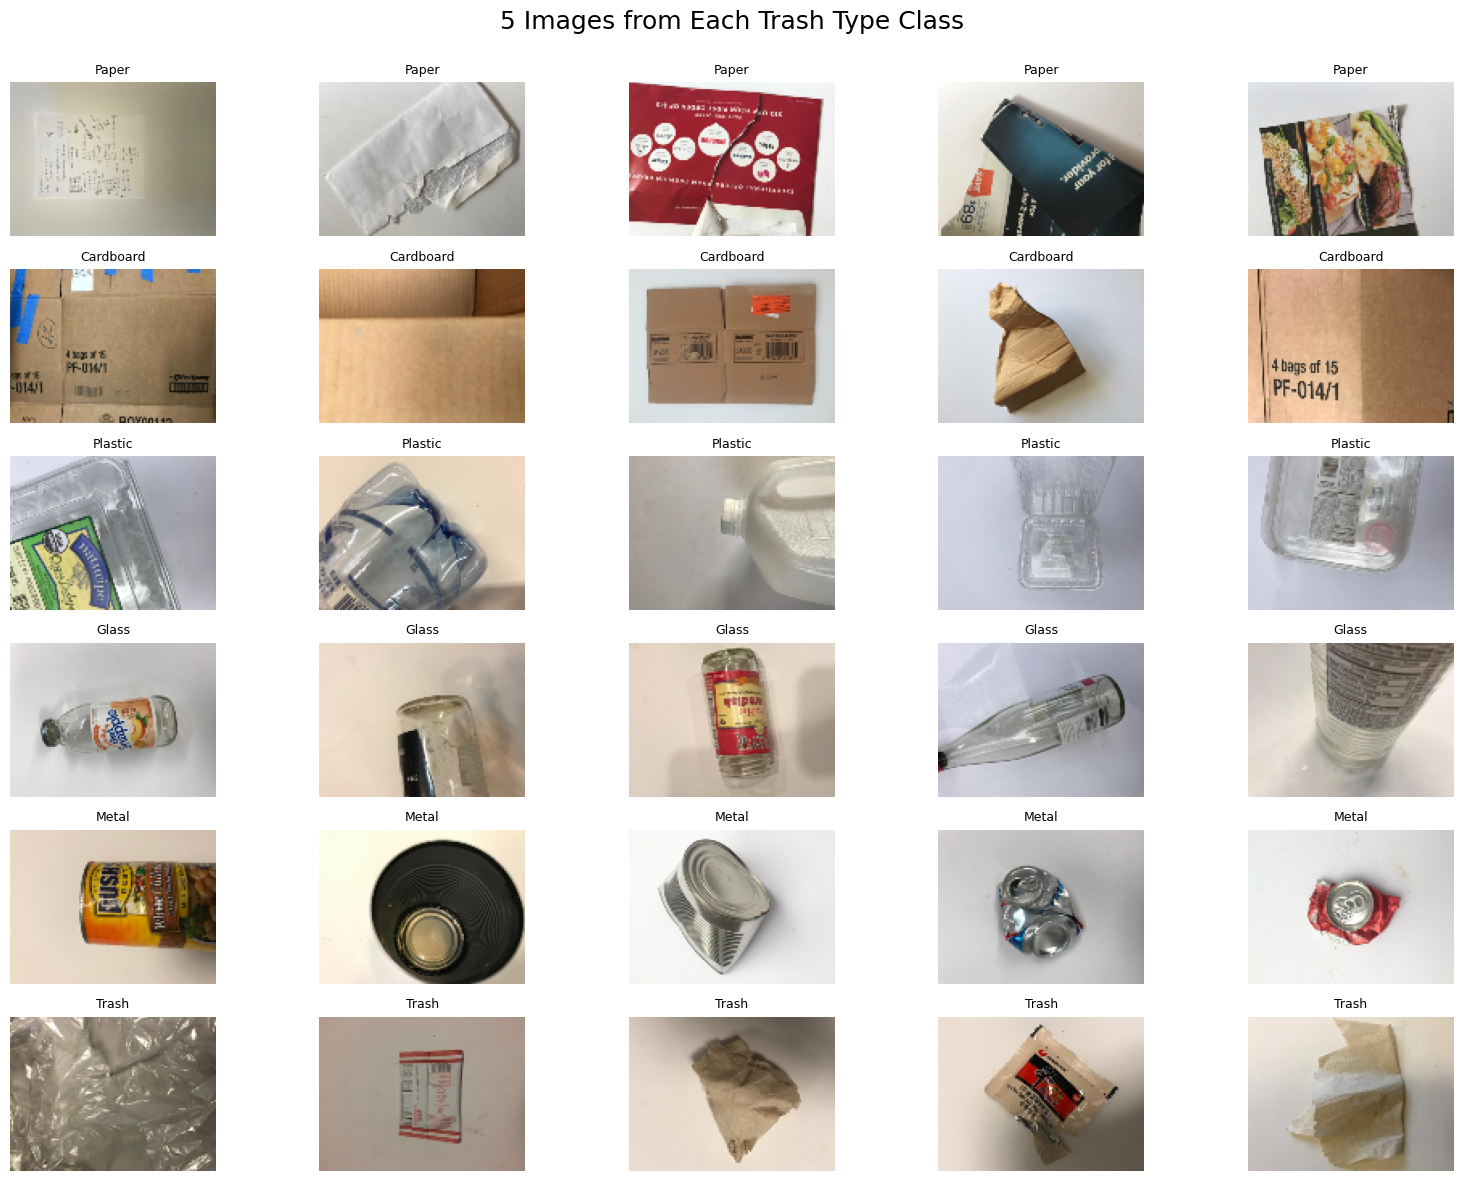

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import random
from collections import defaultdict

# Step 1: Download dataset
import kagglehub
dataset_path = kagglehub.dataset_download("farzadnekouei/trash-type-image-dataset")

# Step 2: Initialize containers
target_classes = ['paper', 'cardboard', 'plastic', 'glass', 'metal', 'trash']
image_dict = defaultdict(list)
image_extensions = ['.jpg', '.jpeg', '.png']

# Step 3: Walk through dataset and collect up to 5 images per class
for root, dirs, files in os.walk(dataset_path):
    class_name = os.path.basename(root).lower()
    if class_name in target_classes:
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                full_path = os.path.join(root, file)
                if len(image_dict[class_name]) < 5:
                    image_dict[class_name].append(full_path)

# Step 4: Flatten images and class labels into lists
all_image_paths = []
all_class_labels = []

for class_name in target_classes:
    all_image_paths.extend(image_dict[class_name])
    all_class_labels.extend([class_name.capitalize()] * len(image_dict[class_name]))

print(f"Total images collected: {len(all_image_paths)}")

# Step 5: Display in a grid: 6 rows × 5 columns
rows = 6
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(16, 12))
fig.suptitle("5 Images from Each Trash Type Class", fontsize=18)

for i, (img_path, label) in enumerate(zip(all_image_paths, all_class_labels)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 96))

    r = i // cols
    c = i % cols

    axs[r, c].imshow(img)
    axs[r, c].set_title(label, fontsize=9)
    axs[r, c].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
